# Sentiment analysis on the Amazon food reviews dataset

Group Name - TeamX

Members:<br>
$\;\;\;\;\;\;$     1. Wijekoon W.H.M.R.M. - IT18154054 (Leader)<br>
$\;\;\;\;\;\;$     2. Ekanayaka W.E.M.D.S. - IT18003574<br>
$\;\;\;\;\;\;$     3. Perera T.R.D. - IT18006230<br>
$\;\;\;\;\;\;$     4. Wijekoon R. T. P. W. W. M. P. M. B. - IT18116366<br>
    
Dataset link:- https://www.kaggle.com/sunnysarma/amazon-food-review-corrected-scoring <br>
GoogleDrive:- https://drive.google.com/file/d/19ZTtfzpaeSe6zTU6roHDia_Yrl4oyOVC/view?usp=sharing

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import string
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data source


In [2]:
os.chdir("D:/SLIIT Documents/Year 3/Semester 2/IRWA/Assignment 3")

rawDataset=pd.read_csv("Amazon_rev.csv") 
rawDataset

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...
525809,525809,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,positive,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
525810,525810,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,negative,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
525811,525811,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,positive,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
525812,525812,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,positive,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
rawDataset.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Cleaning


In [4]:
#sorting
sorted_data = rawDataset.sort_values('ProductId' , axis = 0 , ascending = True)
sorted_data

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...
...,...,...,...,...,...,...,...,...,...,...,...
176791,176791,191721,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,negative,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w..."
1362,1362,1478,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,negative,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w..."
303285,303285,328482,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,positive,1331856000,Perfect,The basket was the perfect sympathy gift when ...
5259,5259,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,positive,1351209600,DELICIOUS,Purchased this product at a local store in NY ...


In [5]:
#Clean missing values
sorted_data.isnull().sum()

Unnamed: 0                 0
Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   25
Text                       0
dtype: int64

In [6]:
sorted_data['ProfileName'].fillna('Unknown',inplace = True)
sorted_data['Summary'].fillna('Unknown',inplace = True)
sorted_data.isnull().sum()

Unnamed: 0                0
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [7]:
#Remove special characters
sorted_data.Text = sorted_data.Text.str.replace('[#,@,&,!,$,%,/,-,*,+,^,_,=]', '') 
sorted_data.Summary = sorted_data.Summary.str.replace('[#,@,&,!,$,%,/,-,*,+,^,_,=]', '') 
#Remove HTML tags
sorted_data.Text = sorted_data.Text.str.replace('<[^<]+?>', '')
sorted_data.Summary = sorted_data.Summary.str.replace('<[^<]+?>', '')
#Remove data between square brackets
sorted_data.Text = sorted_data.Text.str.replace('\[[^]]*\]', '')
sorted_data.Summary = sorted_data.Summary.str.replace('\[[^]]*\]', '')


In [8]:
#deduplication
final = sorted_data.drop_duplicates(subset = {"UserId" , "ProfileName" , "Text" , "Time" } , keep = 'first' , inplace = False)
final

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,Love the book miss the hard cover version,I grew up reading these Sendak books and watch...
138689,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...
...,...,...,...,...,...,...,...,...,...,...,...
178145,178145,193174,B009RSR8HO,A4P6AN2L435PV,romarc,0,0,positive,1350432000,LOVE LOVE,LOVE LOVE this sweetener I use it in all my b...
173675,173675,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,positive,1350518400,Amazing Great sauce for everything,You have to try this sauce to believe it It st...
204727,204727,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,positive,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...
5259,5259,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,positive,1351209600,DELICIOUS,Purchased this product at a local store in NY ...


# Exploratory data analysis

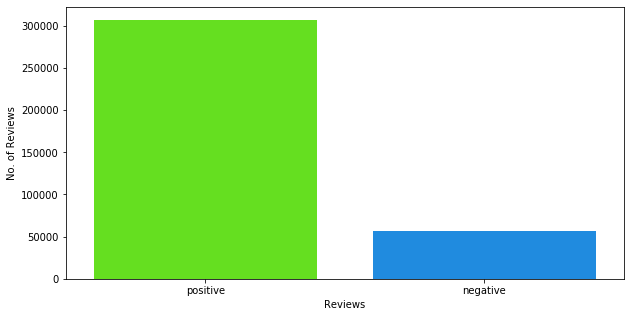

positive    307043
negative     57105
Name: Score, dtype: int64


In [10]:
plt.figure(figsize = (10,5))
sns.countplot(final['Score'] , palette = 'gist_rainbow')
plt.xlabel("Reviews")
plt.ylabel("No. of Reviews")
plt.show()

print(final['Score'].value_counts())

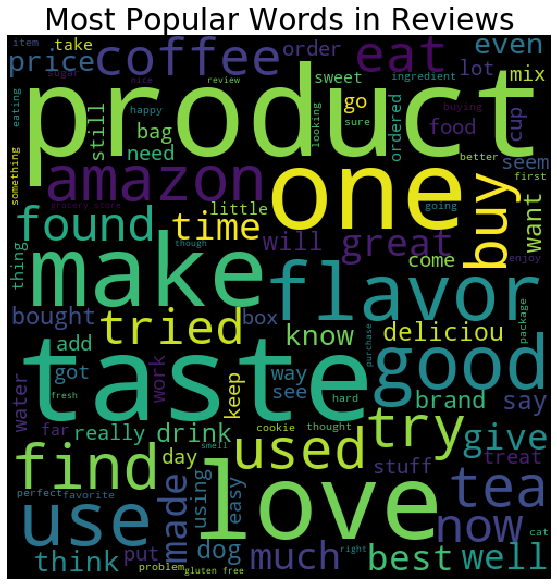

In [11]:
#WordCloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'black', width = 500,  height = 500, max_words = 100).generate(' '.join(final['Text'].str.lower()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Reviews',fontsize = 30)
plt.show()

In [11]:
final.dtypes

Unnamed: 0                 int64
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                     object
Time                       int64
Summary                   object
Text                      object
dtype: object

Text(0.5, 1.0, 'Pie chart for clicking helpful to reviews')

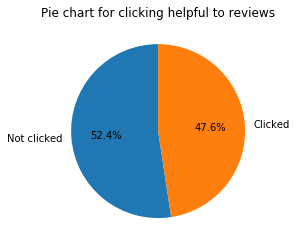

In [12]:
movie_c = final['HelpfulnessNumerator'].value_counts().reset_index()

#helpDF=final['HelpfulnessNumerator'] == 0
#helpDF 
buttonNotClicked= (final['HelpfulnessNumerator'] == 0).sum()
buttonNotClicked
buttonClicked=(final['HelpfulnessNumerator'] > 0).sum()
buttonClicked

Values=[buttonNotClicked,buttonClicked]
labelss= ['Not clicked','Clicked']
plt.pie(Values, labels=labelss, startangle=90, autopct='%.1f%%')
plt.title("Pie chart for clicking helpful to reviews")

In [9]:
import re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score , precision_score , recall_score
from nltk.metrics.scores import (precision , recall , f_measure)

# Text Preprocessing

In [10]:
# Removing stop words , stemming and lemmetization

#set of stop words
stop = set(stopwords.words('english'))
words_to_keep = set(('not'))
stop -= words_to_keep

#initialising porter stemmer
sno = nltk.porter.PorterStemmer()


# text processing code
i = 0
str1 = ' '
final_string = []
all_positive_words = []
all_negative_words = []
w = ''

for sent in final['Text'].values:
    filtered_sentence = []
    for s in sent.split():
        for cleaned_words in s.split():
            if((cleaned_words.isalpha()) & (len(cleaned_words) > 2)):
                if(cleaned_words.lower() not in stop):
                    w = (sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(w)
                    if(final['Score'].values)[i] == 'positive':
                        all_positive_words.append(w)
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(w)
                else:
                    continue
            else:
                continue
                
    str1 = b" ".join(filtered_sentence)

    final_string.append(str1)
    i += 1

In [11]:
#adding an extra column
pd.options.mode.chained_assignment = None
final['CleanedText'] = pd.Series(final_string)
final['CleanedText'] = final['CleanedText'].str.decode("utf-8")

In [12]:
final.isnull().sum()

Unnamed: 0                     0
Id                             0
ProductId                      0
UserId                         0
ProfileName                    0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Score                          0
Time                           0
Summary                        0
Text                           0
CleanedText               113450
dtype: int64

In [13]:
cleaned_final = final
cleaned_final.dropna()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
138706,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,western adventur palat like cultur differ tast...
138688,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,Love the book miss the hard cover version,I grew up reading these Sendak books and watch...,lovingli craft delici german stollen tast good...
138689,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,tri buffalo ribey filet grill minut turn husba...
138690,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,love order christma dinner slave hot warm turk...
138691,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,order gift card arriv right time realli like s...
...,...,...,...,...,...,...,...,...,...,...,...,...
178145,178145,193174,B009RSR8HO,A4P6AN2L435PV,romarc,0,0,positive,1350432000,LOVE LOVE,LOVE LOVE this sweetener I use it in all my b...,eat oatmeal day week breakfast last eat portio...
173675,173675,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,positive,1350518400,Amazing Great sauce for everything,You have to try this sauce to believe it It st...,first tri dragon eye oolong chang fell love ex...
204727,204727,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,positive,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...,way costli someth tast rather like kid candi s...
5259,5259,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,positive,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,tast like rose lime juic obvious mani like lim...


In [14]:
print(final.shape)
print(cleaned_final.shape)
cleaned_final.isnull().sum()

(364148, 12)
(364148, 12)


Unnamed: 0                     0
Id                             0
ProductId                      0
UserId                         0
ProfileName                    0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Score                          0
Time                           0
Summary                        0
Text                           0
CleanedText               113450
dtype: int64

In [15]:
cleaned_final['CleanedText'].replace('', np.nan, inplace=True)
cleaned_final.dropna(subset=['CleanedText'], inplace=True)
cleaned_final.shape

(250693, 12)

In [16]:

x = cleaned_final['CleanedText'].values
y = cleaned_final['Score']

X_train ,X_test ,Y_train ,Y_test = train_test_split(x ,y ,test_size = 0.25, random_state = 4)

In [17]:

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
xTrainVector = tfidf_vectorizer.fit_transform(X_train)
xTestVector = tfidf_vectorizer.transform(X_test)

stdScale = StandardScaler(with_mean = False)
xTrVecStd = stdScale.fit_transform(xTrainVector)
xTsVecStd = stdScale.transform(xTestVector)

 Workload distribution amoung 4 members of the group:
 1.  Wijekoon W.H.M.R.M. - IT18154054 = Random Forest (Leader)
 2.  Ekanayaka W.E.M.D.S. - IT18003574 = Naive Bayes
 3.  Perera T.R.D. - IT18006230 = KNN
 4.  Wijekoon R. T. P. W. W. M. P. M. B. - IT18116366 = SVM

# Random Forest - IT18154054

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=64, random_state=0)
classifier.fit(xTrVecStd, Y_train)

Accuracy = classifier.score(xTsVecStd , Y_test)
print("Accuracy : ", Accuracy)

Accuracy :  0.8401729584835818


In [31]:
predictions = classifier.predict(xTsVecStd)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Y_test, predictions)

array([[   40,  9858],
       [  159, 52617]], dtype=int64)

In [33]:
print("Precision = " , precision_score(Y_test, predictions, pos_label = 'positive'))
print("Recall = ", recall_score(Y_test, predictions , pos_label = 'positive'))
print("f1 Score = ", f1_score(Y_test, predictions , pos_label = 'positive'))

Precision =  0.8422088835534214
Recall =  0.996987266939518
f1 Score =  0.9130853528385872


In [34]:
print(classification_report(Y_test, predictions, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.20      0.00      0.01      9898
    negative       0.84      1.00      0.91     52776

    accuracy                           0.84     62674
   macro avg       0.52      0.50      0.46     62674
weighted avg       0.74      0.84      0.77     62674



In [35]:
#Save the trained model
import pickle
with open('text_classifier_randomforest_new64', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)

#To load the saved model
#with open('text_classifier_randomforest', 'rb') as training_model:
    #model = pickle.load(training_model)

# Naive Bayes - IT18003574

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB().fit(xTrVecStd,Y_train)

predicted = clf.predict(xTsVecStd)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predicted))
print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

#Save the trained model
import pickle
with open('text_classifier_Naive_Bayes', 'wb') as picklefile:
    pickle.dump(clf,picklefile)

Accuracy: 0.5851070619395603
              precision    recall  f1-score   support

    negative       0.16      0.40      0.23      9898
    positive       0.85      0.62      0.72     52776

    accuracy                           0.59     62674
   macro avg       0.51      0.51      0.47     62674
weighted avg       0.74      0.59      0.64     62674

[[ 3948  5950]
 [20053 32723]]


# Support Vector Machine - IT18116366

In [19]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_SVM.fit(xTrVecStd[:10000], Y_train[:10000])

#Predict the response for test dataset
Y_pred = clf_SVM.predict(xTsVecStd[:10000])

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test[:10000], Y_pred[:10000]))

# Classification matrics and Confusion matrix
print(metrics.classification_report(Y_test[:10000], Y_pred[:10000]))
print(metrics.confusion_matrix(Y_test[:10000],Y_pred[:10000]))

import pickle
with open('text_classifier_SVM_10000', 'wb') as picklefile:
    pickle.dump(clf_SVM,picklefile)

Accuracy: 0.6927
              precision    recall  f1-score   support

    negative       0.15      0.20      0.17      1562
    positive       0.84      0.78      0.81      8438

    accuracy                           0.69     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.73      0.69      0.71     10000

[[ 317 1245]
 [1828 6610]]


# K-NN - IT18006230

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier_knn = KNeighborsClassifier(n_neighbors=15)
classifier_knn.fit(xTrVecStd, Y_train)

y_pred_knn = classifier_knn.predict(xTsVecStd)

print(confusion_matrix(Y_test, y_pred_knn))
print(classification_report(Y_test, y_pred_knn))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_knn))

import pickle
with open('text_classifier_KNN', 'wb') as picklefile:
    pickle.dump(classifier_knn,picklefile)

[[   13  9885]
 [   39 52737]]
              precision    recall  f1-score   support

    negative       0.25      0.00      0.00      9898
    positive       0.84      1.00      0.91     52776

    accuracy                           0.84     62674
   macro avg       0.55      0.50      0.46     62674
weighted avg       0.75      0.84      0.77     62674

Accuracy: 0.8416568273925392


In [32]:
print("Precision = " , precision_score(Y_test, y_pred_knn, pos_label = 'positive'))
print("Recall = ", recall_score(Y_test, y_pred_knn , pos_label = 'positive'))
print("f1 Score = ", f1_score(Y_test, y_pred_knn , pos_label = 'positive'))

Precision =  0.8421481268563763
Recall =  0.9992610277398818
f1 Score =  0.9140019757708105


Error measuring is done using below code (Commented because of the high execution time)
Result is inserted as image from the first execution

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrVecStd, Y_train)
    pred_i = knn.predict(xTsVecStd)
    error.append(np.mean(pred_i != Y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Added a Screenshot of the output due to high execution time

![KNN-error.png](attachment:KNN-error.png "Added a Screenshot of the output due to high execution time")
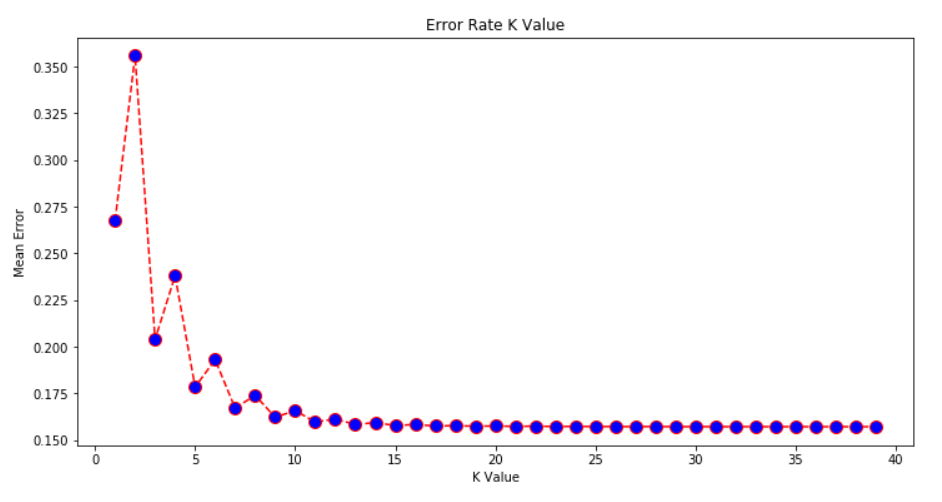

<h3>As per the accuracy levels, <b>KNeighbors Classifier<b> is the best algorith for this sentiment analysis</h3>
    <p> As it has the highest accuracy level and balanced confusion matix it can be chosen as the best algorith to do the sentiment analysis for this dataset. As it has 84% of Precision and 99% of Recall we think it canbe chosen as the best algorithm. F1 score(91%) also proves that KNN is the best algorithm to be used for the sentiment analysis </p>

How can you improve the performance of your models? <br>
<ol>
    <li>By adding more data</li>
    <li>By Using Ensemble Cross-Validation</li>
</ol>
